# Classical High Order Methods

### Table of contents
 1. Chapter 2: Classical Methods
    1. [Section 1.1: Runge Kutta](#RK)
    1. [Section 1.2: Multistep methods](#multistep)

In [ ]:
# If you do not have numpy, matplotlib, scipy or nodepy, run this cell
!pip install numpy
# This is the basic package in python with all the numerical functions

!pip install scipy
# This package has some functions to deal with polynomials

!pip install matplotlib
# This package allows to  plot

!pip install nodepy
# This package has some interesting features for RK methods

In [84]:
# We need a couple of packages in this chapter
import numpy as np  
# This is the basic package in python with all the numerical functions

import matplotlib.pyplot as plt 
# This package allows to  plot

from nodepy import rk
#This package already implemented some functions for Runge Kutta and multistep methods

* How to obtain generalizations of the Euler methods?
* How can we obtain higher order of accuracy $\Delta t^p$?

![Generalization of Euler](images/chapter2/generalizeEuler.png)

## Runge Kutta Methods <a id='RK'></a>

The basic idea of Runge--Kutta methods is to introduce further stages inside the computation of one step, in order to achieve higher order of accuracy.

### $\theta$ method

For example consider the following method:

$$
y^{*}=y^n +\theta \Delta t F(t^n,y^n)\\
y^{n+1} = y^n +\Delta t \left( \frac{2\theta-1}{2\theta}F(t^n,y^n) + \frac{1}{2\theta} F(t^n+\theta\Delta t,y^*) \right).
$$

We introduced 1 extra stage. Do we get an extra order?

#### Taylor expansion for local truncation
Suppose that $y^n=y(t^n)$, define $t^*=t^n+\theta \Delta t$, and suppose that $F$ does not depends explicitly on time,

$$
\begin{align}
y(t^{n+1})&=y^n + \Delta t y'(t^n) + \frac{\Delta t^2}{2} y''(t^n) + \mathcal{O}(\Delta t^3)\\
y(t^{*})&=y^n + \theta\Delta t y'(t^n) + \frac{\theta^2\Delta t^2}{2} y''(t^n) + \mathcal{O}(\Delta t^3)\\
y^{*} &= y^n + \theta \Delta t F(y^n) = y(t^*)+ \mathcal{O}(\Delta t^2)\\
y^{n+1} &= y^n +\Delta t \left( \frac{2\theta-1}{2\theta}F(t^n,y^n) + \frac{1}{2\theta} F(y^*) \right)\\
&= y^n +\Delta t \left( \frac{2\theta-1}{2\theta}y'(t^n) + \frac{1}{2\theta} F(y^n+\theta \Delta t y'(t^n)) \right) + \mathcal{O}(\Delta t^3)\\
&= y^n +\Delta t \left( \frac{2\theta-1}{2\theta}y'(t^n) + \frac{1}{2\theta} F(y^n)+\frac{1}{2\theta} \frac{dF}{dy}(y^n)\theta \Delta t y'(t^n)  \right) + \mathcal{O}(\Delta t^3)\\
&= y^n +\Delta t \left( \frac{2\theta-1}{2\theta}y'(t^n) + \frac{1}{2\theta} y'(t^n)+\frac{1}{2\theta} \frac{dF}{dt}(y^n)\theta \Delta t   \right) + \mathcal{O}(\Delta t^3)\\
&= y^n +\Delta t \left( y'(t^n)+\frac{1}{2\theta} \frac{d}{dt}(y'(t^n))\theta \Delta t   \right) + \mathcal{O}(\Delta t^3)\\
&= y^n +\Delta t \left( y'(t^n)+\frac{1}{2} y''(t^n) \Delta t   \right) + \mathcal{O}(\Delta t^3)=y(t^{n+1})+\mathcal{O}(\Delta t^3).
\end{align}
$$

So, second order in the **global** error.

### General formulation
A general Runge--Kutta method with $S$ stages can be written using a Butcher tableau
$$
\begin{array}
{c|c}
c&A\\
\hline
& b^T
\end{array}
$$
where $A\in \mathbb R^{S\times S},\, b,c\in\mathbb R^S$, in the following formulation

$$
\begin{cases}
y^{(k)}=y^n + \Delta t \sum_{j=1}^S a_{kj} F(t^n+c_j\Delta t,y^{(j)}), \quad k=1,\dots, S,\\
y^{n+1} = y^n+ \Delta t \sum_{j=1}^S b_{j} F(t^n+c_j\Delta t,y^{(j)})
\end{cases}
$$

To be an **explicit** scheme $A$ must be a strictly low-triangular matrix, i.e., $a_{ij}=0$ if $j\geq i$. 

#### Example $\theta$ scheme
The $\theta$ scheme we have seen before can be written as

$$
\begin{array}
{c|cc}
0\\
\theta & \theta\\
\hline
& \frac{2\theta -1}{2\theta} &\frac{1}{2\theta} 
\end{array}
$$

We see that the scheme is explicit, because there is nothing on the top right of $A$.

### Order of explicit RK schemes
How do we know that a RK scheme has a certain order?
For $\theta $ method we have written the Taylor expansion up to the order we were expecting and we matched the coefficients of the exact solution with the one of the approximated solutions at all the steps.

If one wants to generalize this conditions using the Taylor expansion, it takes long, but you can get to similar results

![Generalization of Euler](images/chapter2/orderCOnditionRK4.png)

Where the first condition is for order 1 RK methods,

the first 2 conditions are for order 2 RK methods,

the first 4 conditions are for order 3 RK methods,

all the 8 conditions are for order 4 RK methods.


* How can the conditions be computed without doing the Taylor expansions?

#### Trees 
A very smart way of computing all the conditions is given by combinatorial arguments that can be represented as trees. 
You can find the proof in [Butcher](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119121534)

![Tree Order](images/chapter2/treeOrder.png)

A tree is an object with nodes and branches as in figure, with **leaves** on top (nodes without further branches outward going) and a **root** at the bottom (the node with only branches outgoing).

The **order** of a tree is the number of nodes in that tree.

A RK scheme is of order $p$ if all the trees of order less or equal to $p$ verify certain conditions.

All the conditions that must verified are of the type $\Phi(a_{ij},b_i,c_j)=\frac{1}{\gamma}$ polynomial in the coefficients of the Butcher tableau equal to the inverse of an integer. 
For every tree is very easy to compute such polynomial $\Phi$ and the integer $\gamma$.

Here is an example:

![Tree Order](images/chapter2/treePoly.png)

For order 4 we have all these trees and conditions

![Tree Order](images/chapter2/treesOrder4.png)

Reminder: an explicit RK method with $S$ stages has $\frac{S^2+3S-2}{2}$ coefficients.

| Stages/Order  | Trees | Conditions | Explicit RK coefficient |
|---|---|---|---|
| 1  | 1  | 1  | 1  |
| 2  | 1  | 2  | 4  |
| 3  | 2  | 4  | 8  |
| 4  | 4  | 8  | 13  |
| 5  | 9  | 17  | 19  |
| 6  | 20 | 37  | 26  |
| 7  | 48 | 85     | 34  |
| 8  | 115 | 200   | 43  |
| 9  | 286 | 486   | 53  |
| 10 | 719 | 1205  | 64  |

Moreover, the solution of these conditions should be admissible. For example, there is no 5 stages 5th order explicit RK method, one needs 6 stages. As well, some of the relations may be redundant. Building higher order explicit Runge Kutta method is a challenge.

An extract of Butcher

![Higher Order Butcher](images/chapter2/orderVsStages.png)

#### Theorem 324C [Butcher](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119121534)
For any positive integer $p$, an explicit RK method exists with order $p$ and $S$ stages, where
\begin{equation}
S=\begin{cases}
\frac{3p^2-10p+24}{8}, \quad & p \text{ even,}\\
\frac{3p^2-4p+9}{8}, \quad & p \text{ odd.}
\end{cases}
\end{equation}

| Order  | Stages  |
|---|---|
| 1  | 1  |
| 2  | 2  | 
| 3  | 3  |
| 4  | 4  | 
| 5  | 8  |
| 6  | 9  | 
| 7  | 16 |
| 8  | 17 |
| 9  | 27 | 
| 10 | 28 | 

Examples of explicit RK4
$$
\begin{array}
{c|cccc}
0\\
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} &0 &\frac{1}{2} \\
1& 0& 0& 1\\
\hline
& \frac{1}{6} &\frac{1}{3} &\frac{1}{3} &\frac{1}{6} 
\end{array} \qquad  \begin{array}
{c|cccc}
0\\
\frac{1}{4} & \frac{1}{4}\\
\frac{1}{2} &0 &\frac{1}{2} \\
1& 1& -2& 2\\
\hline
& \frac{1}{6} &0 &\frac{2}{3} &\frac{1}{6} 
\end{array}
$$

An explicit RK5
$$
\begin{array}
{c|cccccc}
0\\
\frac{1}{4} & \frac{1}{4}\\
\frac{1}{4} &\frac{1}{8} &\frac{1}{8} \\
\frac{1}{2}& 0& 0& \frac{1}{2}\\
\frac{3}{4}& \frac{3}{16}& -\frac{3}{8}& \frac{3}{8}&\frac{9}{16}\\
1& -\frac{3}{7}& \frac{8}{7}& \frac{6}{7} & -\frac{12}{7} & \frac{8}{7}\\
\hline
& \frac{7}{90}&0 &\frac{32}{90} &\frac{12}{90} &\frac{32}{90}&\frac{7}{90} 
\end{array} 
$$

### Implicit RK schemes
The implicit RK schemes are defined as usual RK schemes and have at least a nonzero element in the upper triangular part of $A$. 
They have the advantage of requiring **less stages** (with respect to explicit RK) to obtain the order of accuracy required.

For example 

$$
\begin{array}
{c|cc}
\frac{1}{2}-\frac{\sqrt{3}}{6} & \frac{1}{4} &\frac{1}{4}-\frac{\sqrt{3}}{6}\\
\frac{1}{2}+\frac{\sqrt{3}}{6}  &\frac{1}{4}+\frac{\sqrt{3}}{6} & \frac{1}{4}\\
\hline
& \frac{1}{2} &\frac{1}{2} 
\end{array}
$$

has order 4. 

There are clever ways of building implicit RK methods using well known high order accurate quadrature rules.

Take a quadrature rule of order $p$ with $S$ quadrature points $c_i \in [0,1]$, provided with $S$ interpolation polynomials $\varphi_i$, such that $\varphi_i(c_j)=\delta_{i,j}$ and

$$
y(t) = \sum_{i=1}^S \varphi_i(t) y(t^n+c_i\Delta t) + \mathcal{O}(\Delta t^{p+1}), \qquad \forall t \in [t^n,t^{n+1}].
$$

We can then define the $a_{ij}$ approximating 

$$
y^{(i)}=y^n+\int_{t^n}^{t^n+c_i\Delta t} F(t,y(t))dt\approx y^n+\sum_{j} \int_{t^n}^{t^n+c_i\Delta t} \varphi_j(t) dt F(t,y^{(j)})  
$$

so that

$$
a_{ij}:=\int_{t^n}^{t^n+c_i\Delta t} \varphi_j(t) dt
$$

and similarly 

$$
b_{j}:=\int_{t^n}^{t^{n+1}} \varphi_j(t) dt.
$$

This guarantees a high order quadrature rule also in the final step, keeping the right accuracy order in every step of the RK method.

Using Gauss--Legendre polynomials one gets $p=2s$, examples


$$
\begin{array}
{c|c}
\frac{1}{2} & \frac{1}{2}\\
\hline
s=1, p=2 & 1 
\end{array}
$$

$$
\begin{array}
{c|cc}
\frac{1}{2}-\frac{\sqrt{3}}{6} & \frac{1}{4} &\frac{1}{4}-\frac{\sqrt{3}}{6}\\
\frac{1}{2}+\frac{\sqrt{3}}{6}  &\frac{1}{4}+\frac{\sqrt{3}}{6} & \frac{1}{4}\\
\hline
s=2, p=4 & \frac{1}{2} &\frac{1}{2} 
\end{array}
$$

$$
\begin{array}
{c|ccc}
\frac{1}{2}-\frac{\sqrt{15}}{10} & \frac{5}{36} &\frac{2}{9}-\frac{\sqrt{15}}{15} &\frac{5}{36} -\frac{\sqrt{15}}{30} \\
\frac{1}{2} & \frac{5}{36}+\frac{\sqrt{15}}{24}  &\frac{2}{9}&\frac{5}{36} -\frac{\sqrt{15}}{24} \\
\frac{1}{2}+\frac{\sqrt{15}}{10}+\frac{\sqrt{15}}{30} & \frac{5}{36} &\frac{2}{9}+\frac{\sqrt{15}}{15} &\frac{5}{36}  \\
\hline
s=3, p=6 & \frac{5}{18} &\frac{4}{9} &\frac{5}{18} 
\end{array}
$$

Using Gauss--Lobatto or Radau points one decrease the order $p=2s-1$, but increases stability.

### Stability
As we have seen before for Euler, the stability can be evaluated on Dahlquist's equation

$$ y'=qy$$ 

with Re$(q)\leq 0$. Considering $z=\theta q$ we want to write the RK methods on this problem as 

$$
y^{n+1}=R(z)y^n
$$

and find the stability region $\mathcal S=\lbrace z\in \mathbb C : |R(z)|\leq 1\rbrace$.

It is actually very simple to write the stability function $R$ for these problems. 
Let $Y\in \mathbb R^S$ be the solution of the RK method at all the stages, namely, it solves

$$
Y=\mathbf{1}y^n + \Delta t q A Y
$$

or

$$
(I-zA)Y=\mathbf{1}y^n \quad \Leftrightarrow Y=(I-zA)^{-1}\mathbf{1} y^n
$$

with $\mathbf 1$ the vector of dimension $S$ with all entries equal to 1.

Substituting this into the final update, we have

$$
y^{n+1} = y^n + z b^{T}Y=y^n + z b^T(I-zA)^{-1}\mathbf{1} y^n = (1+ z b^T(I-zA)^{-1}\mathbf{1}) y^n$$


which gives a way of computing the stability region very efficiently with 

$$
R(z) =1+ z b^T(I-zA)^{-1}\mathbf{1}.
$$

[[0 0 0 0]
 [1/2 0 0 0]
 [0 1/2 0 0]
 [0 0 1 0]]
[1/6 1/3 1/3 1/6]


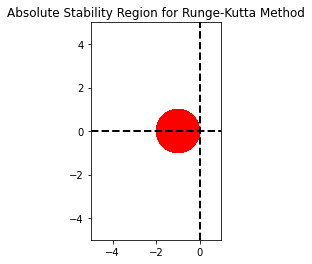

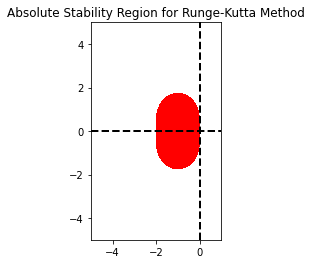

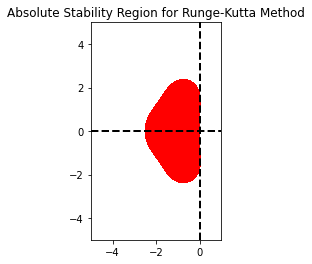

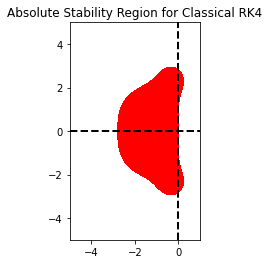

In [75]:
A=np.array([[0,0],[1/2,0]])
b=np.array([0,1])
rk2 = rk.ExplicitRungeKuttaMethod(A,b)

A=np.array([[0]])
b=np.array([1])
rk1 = rk.ExplicitRungeKuttaMethod(A,b)


A=np.array([[0,0,0],[2/3,0,0],[1/3,1/3,0]])
b=np.array([1/4,0,3/4])
rk3 = rk.ExplicitRungeKuttaMethod(A,b)

rk44=rk.loadRKM('RK44')


rk1.plot_stability_region(bounds=[-5,1,-5,5])
rk2.plot_stability_region(bounds=[-5,1,-5,5])
rk3.plot_stability_region(bounds=[-5,1,-5,5])
rk44.plot_stability_region(bounds=[-5,1,-5,5])

print(rk44.A)
print(rk44.b)

### Stability for implicit method
Implicit methods are able to deal with stiff problems, hence, other types of stability are more interesting in this situation.

##### A-stability 
A methods is A-stable if $|R(z)|\leq 1$ whenever Re$(z)\leq 0$.

##### L-stability
A method is L-stable if it is A-stable and $R(\infty)=0$.

This gives better stability conditions in case of stiff problems.

Radau and Lobatto implicit RK methods are L-stable, while Gauss--Legendre are only A-stable.

One can write down the conditions for RK scheme to have these stabilities. [see Butcher](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119121534)

Lobatto IIIC2
The LobattoIIIC method with 2 stages
 0    | 1/2   -1/2
 1    | 1/2   1/2
______|____________
      | 1/2   1/2
The stability region is unbounded


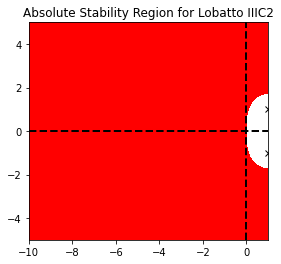

Lobatto IIIC3
The LobattoIIIC method with 3 stages
 0     | 1/6    -1/3   1/6
 1/2   | 1/6    5/12   -1/12
 1     | 1/6    2/3    1/6
_______|_____________________
       | 1/6    2/3    1/6
The stability region is unbounded


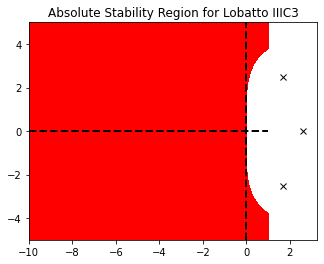

Lobatto IIIC4
The LobattoIIIC method with 4 stages
 0                  | 1/12                -sqrt(5)/12         sqrt(5)/12          -1/12
 1/2 - sqrt(5)/10   | 1/12                1/4                 1/6 - 7*sqrt(5)/60  sqrt(5)/60
 sqrt(5)/10 + 1/2   | 1/12                1/6 + 7*sqrt(5)/60  1/4                 -sqrt(5)/60
 1                  | 1/12                5/12                5/12                1/12
____________________|________________________________________________________________________________
                    | 1/12                5/12                5/12                1/12
The stability region is unbounded


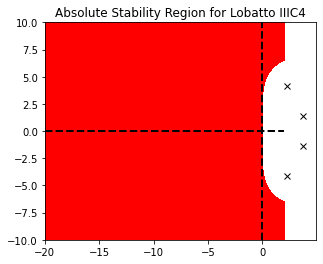

Gauss-Legendre RK24

 1/2 - sqrt(3)/6 | 1/4              1/4 - sqrt(3)/6
 sqrt(3)/6 + 1/2 | 1/4 + sqrt(3)/6  1/4
_________________|__________________________________
                 | 1/2              1/2
The stability region is unbounded


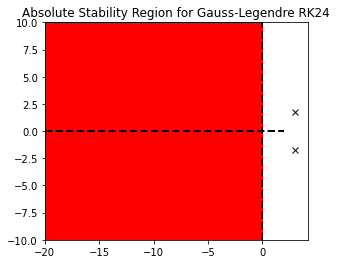

Gauss-Legendre RK36

 1/2 - sqrt(15)/10  | 5/36                2/9 - sqrt(15)/15   5/36 - sqrt(15)/30
 1/2                | 5/36 + sqrt(15)/24  2/9                 5/36 - sqrt(15)/24
 sqrt(15)/10 + 1/2  | sqrt(15)/30 + 5/36  2/9 + sqrt(15)/15   5/36
____________________|____________________________________________________________
                    | 5/18                4/9                 5/18
The stability region is unbounded


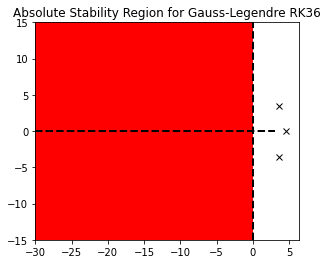

SDIRK23
3rd-order SDIRK method of Norsett
 sqrt(3)/6 + 1/2 | sqrt(3)/6 + 1/2
 1/2 - sqrt(3)/6 | -sqrt(3)/3       sqrt(3)/6 + 1/2
_________________|__________________________________
                 | 1/2              1/2
The stability region is unbounded


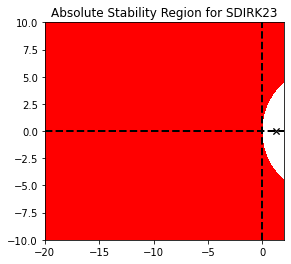

In [161]:
for method in ["LobattoIIIC2","LobattoIIIC3","LobattoIIIC4", "GL2","GL3","SDIRK23"]:
    imRK=rk.loadRKM(method)
    print(imRK)
    imRK.plot_stability_region()
    plt.show()

In [88]:
import numpy as np

## Linear scalar Dahlquist's equation
def linear_scalar_flux(u,t=0,k_coef=10):
    ff=np.zeros(np.shape(u))
    ff[0]= -k_coef*u[0]
    return ff

def linear_scalar_exact_solution(u0,t,k_coef=10):
    return np.array([np.exp(-k_coef*u0[0]*t)])


def linear_scalar_jacobian(u,t=0,k_coef=10):
    Jf=np.zeros((len(u),len(u)))
    Jf[0,0]=-k_coef
    return Jf

#nonlinear problem y'=-ky|y| +1  
def nonlinear_scalar_flux(u,t=0,k_coef=10):
    ff=np.zeros(np.shape(u))
    ff[0]=-k_coef*abs(u[0])*u[0] +1
    return ff


def nonlinear_scalar_exact_solution(u0,t,k_coef = 10):
        sqrtk = np.sqrt(k_coef)
        ustar = 1 / sqrtk
        if u0[0] >= ustar:
            uex=np.array([1./np.tanh(sqrtk * t + np.arctanh(1/sqrtk /u0[0])) / sqrtk])
        elif u0[0] < 0 and t < - np.atan(sqrtk * u0[0]) / sqrtk:
            uex=np.array([np.tan(sqrtk * t + np.arctan(sqrtk * u0[0])) / sqrtk])
        else:
            uex=np.array([np.tanh(sqrtk * t + np.arctanh(sqrtk * u0[0])) / sqrtk])
        return uex

def nonlinear_scalar_jacobian(u,t=0,k_coef=10):
    Jf=np.zeros((len(u),len(u)))
    Jf[0,0]=-k_coef*abs(u[0])
    return Jf


# SYSTEMS


# linear systems
def linear_system2_flux(u,t=0):
    d=np.zeros(len(u))
    d[0]= -5*u[0] + u[1]
    d[1]= 5*u[0] -u[1]
    return d


def linear_system2_exact_solution(u0,t):
    A=np.array([[-5,1],[5,-1]])
    u_e=u0+(1-np.exp(-6*t))/6*np.dot(A,u0)
    return u_e

def linear_system2_jacobian(u,t=0):
    Jf=np.array([[-5,1],[5,-1]])
    return Jf

linear_system2_matrix = np.array([[-5,1],[5,-1]])

def linear_system2_production_destruction(u,t=0):
    p=np.zeros((len(u),len(u)))
    d=np.zeros((len(u),len(u)))
    p[0,1]=u[1]
    d[1,0]=u[1]
    p[1,0]=5*u[0]
    d[0,1]=5*u[0]
    return p,d

#lin system 3 x3

def linear_system3_flux(u,t=0):
    d=np.zeros(len(u))
    d[0]= -u[0] + 3*u[1]
    d[1]= -3*u[1] + 5*u[2]
    d[2]= -5*u[2] 
    return d


def linear_system3_exact_solution(u0,t=0):
    u_e = np.zeros(len(u0))
    u_e[0] = 15.0/8.0*u0[2]*(np.exp(-5*t) - 2*np.exp(-3*t)+np.exp(-t))
    u_e[1] = 5.0/2.0*u0[2]*(-np.exp(-5*t) + np.exp(-3*t))
    u_e[2] = u0[2]*np.exp(-5*t)
    return u_e
def linear_system3_jacobian(u,t=0):
    Jf=np.zeros((len(u),len(u)))
    Jf[0,0]=-1.
    Jf[0,1]=3
    Jf[1,1] = -3
    Jf[1,2] = 5
    Jf[2,2] = -5 
    return Jf


## Nonlinear 3x3 system production destruction
def nonlinear_system3_flux(u,t=0):
    ff=np.zeros(len(u))
    ff[0]= -u[0]*u[1]/(u[0]+1)
    ff[1]= u[0]*u[1]/(u[0]+1) -0.3*u[1]
    ff[2]= 0.3*u[1]
    return ff

def nonlinear_system3_production_destruction(u,t=0):
    p=np.zeros((len(u),len(u)))
    d=np.zeros((len(u),len(u)))
    p[1,0]=u[0]*u[1]/(u[0]+1)
    d[0,1]=p[1,0]
    p[2,1]=0.3*u[1]
    d[1,2]=p[2,1]
    return p,d


# SIR Model
def SIR_flux(u,t=0,beta=3,gamma=1):
    ff=np.zeros(len(u))
    N=np.sum(u)
    ff[0]=-beta*u[0]*u[1]/N
    ff[1]=+beta*u[0]*u[1]/N - gamma*u[1]
    ff[2]= gamma*u[1]
    return ff

def SIR_jacobian(u,t=0,beta=3,gamma=1):
    Jf=np.zeros((len(u),len(u)))
    N=np.sum(u)
    Jf[0,0]=-beta*u[1]/N
    Jf[0,1]=-beta*u[0]/N
    Jf[1,0]= beta*u[1]/N
    Jf[1,1]= beta*u[0]/N - gamma
    Jf[2,1] = gamma 
    return Jf

def SIR_production_destruction(u,t=0,beta=3,gamma=1):
    p=np.zeros((len(u),len(u)))
    d=np.zeros((len(u),len(u)))
    N=np.sum(u)
    p[1,0]=beta*u[0]*u[1]/N
    d[0,1]=p[1,0]
    p[2,1]=gamma*u[1]
    d[1,2]=p[2,1]
    return p,d

# Nonlinear_oscillator
def nonLinearOscillator_flux(u,t=0,alpha=0.):
    ff=np.zeros(np.shape(u))
    n=np.sqrt(np.dot(u,u))
    ff[0]=-u[1]/n-alpha*u[0]/n
    ff[1]=u[0]/n - alpha*u[1]/n
    return ff

def nonLinearOscillator_exact_solution(u0,t):
    u_ex=np.zeros(np.shape(u0))
    n=np.sqrt(np.dot(u0,u0))
    u_ex[0]=np.cos(t/n)*u0[0]-np.sin(t/n)*u0[1]
    u_ex[1]=np.sin(t/n)*u0[0]+np.cos(t/n)*u0[1]
    return u_ex


# Non linear oscillator damped
def nonLinearOscillatorDamped_flux(u,t,alpha=0.01):
    ff=np.zeros(np.shape(u))
    n=np.sqrt(np.dot(u,u))
    ff[0]=-u[1]/n-alpha*u[0]/n
    ff[1]=u[0]/n - alpha*u[1]/n
    return ff

def nonLinearOscillatorDamped_exact_solution(u0,t,alpha=0.01):
    u_ex=np.zeros(np.shape(u0))
    n0=np.sqrt(np.dot(u0,u0))
    n=n0*np.exp(-alpha*t)
    u_ex[0]=n/n0*(np.cos(t/n)*u0[0]-np.sin(t/n)*u0[1])
    u_ex[1]=n/n0*(np.sin(t/n)*u0[0]+np.cos(t/n)*u0[1])
    return u_ex


# pendulum
def pendulum_flux(u,t=0):
    ff=np.zeros(np.shape(u))
    ff[0]=u[1]
    ff[1]=-np.sin(u[0])
    return ff

def pendulum_jacobian(u,t=0):
    Jf=np.zeros((2,2))
    Jf[0,1]=1.
    Jf[1,0]=np.cos(u[0])
    return Jf

def pendulum_entropy(u,t=0):
    return np.array(0.5*u[1]**2.-np.cos(u[0]), dtype=np.float)

def pendulum_entropy_variables(u,t=0):
    v=np.zeros(np.shape(u))
    v[0]=np.sin(u[0])
    v[1]=u[1]
    return v

# Robertson
def Robertson_flux(u,t=0,alpha=10**4,beta=0.04, gamma=3*10**7):
    ff=np.zeros(np.shape(u))
    ff[0] = alpha*u[1]*u[2]-beta*u[0]
    ff[1] = beta*u[0]-alpha*u[1]*u[2] - gamma*u[1]**2
    ff[2] = gamma*u[1]**2
    return ff

def Robertson_jacobian(u,t=0,alpha=10**4,beta=0.04, gamma=3*10**7):
    Jf=np.zeros((3,3))
    Jf[0,0]= -beta 
    Jf[0,1]= alpha*u[2]
    Jf[0,2]= alpha*u[1]
    Jf[1,0]= beta
    Jf[1,1]= -alpha*u[2]-2*gamma*u[1]
    Jf[1,2]= -alpha*u[1]
    Jf[2,1] = 2*gamma*u[1] 
    return Jf

def Robertson_production_destruction(u,t=0,alpha=10**4,beta=0.04, gamma=3*10**7):
    p=np.zeros((len(u),len(u)))
    d=np.zeros((len(u),len(u)))
    p[0,1]=alpha*u[1]*u[2]
    d[1,0]=p[0,1]
    p[1,0]=beta*u[0]
    d[0,1]=p[1,0]
    p[2,1]=gamma*u[1]**2
    d[1,2]=p[2,1]
    return p,d

def Robertson_rhs(u,t=0):
    return np.zeros(3)

  
# Lotka:
def lotka_flux(u,t=0,alpha=1,beta=0.2,delta=0.5,gamma=0.2):
    ff=np.zeros(np.shape(u))
    ff[0]=alpha*u[0]-beta*u[0]*u[1]
    ff[1]=delta*beta*u[0]*u[1]-gamma*u[1]
    return ff

def lotka_jacobian(u,t=0,alpha=1,beta=0.2,delta=0.5,gamma=0.2):
    Jf=np.zeros((2,2))
    Jf[0,0] = alpha -beta*u[1]
    Jf[0,1] = -beta*u[0]
    Jf[1,0] = delta*beta*u[1]
    Jf[1,1] = delta*beta*u[0] -gamma
    return Jf


#3 bodies problem in 2D: U=(x_1,x_2,v_1,v_2,y_1,y_2,w_1,w_2,z_1,z_2,s_1,s_2)
# where x is the 2D position of body1 and v is speed body1 sun
# y, w are position and velocity body2 earth
# z, s are position and velocity body3 mars

def threeBodies_flux(u,t=0):
    m1=1.98892*10**30
    m2=5.9722*10**24
    m3=6.4185*10**23
    G=6.67*10**(-11)
    f=np.zeros(np.shape(u))
    x=u[0:2]
    v=u[2:4]
    y=u[4:6]
    w=u[6:8]
    z=u[8:10]
    s=u[10:12]
    dxy3=np.linalg.norm(x-y)**3
    dxz3=np.linalg.norm(x-z)**3
    dyz3=np.linalg.norm(y-z)**3
    f[0:2]=v
    f[2:4]=-m2*G/dxy3*(x-y)-m3*G/dxz3*(x-z)
    f[4:6]=w
    f[6:8]=-m1*G/dxy3*(y-x)-m3*G/dyz3*(y-z)
    f[8:10]=s
    f[10:12]=-m1*G/dxz3*(z-x)-m2*G/dyz3*(z-y)
    return f


class ODEproblem:
    def __init__(self,name):
        self.name=name
        if self.name=="linear_scalar":
            self.u0 = np.array([1.])
            self.T_fin= 2.
            self.k_coef=10
            self.matrix=np.array([-self.k_coef])
        elif self.name=="nonlinear_scalar":
            self.k_coef=10
            self.u0 = np.array([1.1/np.sqrt(self.k_coef)])
            self.T_fin= 1.
        elif self.name=="linear_system2":
            self.u0 = np.array([0.9,0.1])
            self.T_fin= 1.
            self.matrix = np.array([[-5,1],[5,-1]])
        elif self.name=="linear_system3":
            self.u0 = np.array([0,0.,10.])
            self.T_fin= 10.
        elif self.name=="nonlinear_system3":
            self.u0 = np.array([9.98,0.01,0.01])
            self.T_fin= 30.
        elif self.name=="SIR":
            self.u0 = np.array([1000.,1,10**-20])
            self.T_fin= 10.
        elif self.name=="nonLinearOscillator":
            self.u0 = np.array([1.,0.])
            self.T_fin= 50
        elif self.name=="nonLinearOscillatorDamped":
            self.u0 = np.array([1.,0.])
            self.T_fin= 50
        elif self.name=="Robertson":
            self.u0 = np.array([1.,10**-20,10**-20])
            self.T_fin= 10.**10.
        elif self.name=="lotka":
            self.u0 = np.array([1.,2.])
            self.T_fin= 100.
        elif self.name=="threeBodies":
            self.u0 = np.array([0,0,0,0,149*10**9,0,0,30*10**3,-226*10**9,0,0,-24.0*10**3])
            self.T_fin= 10.**8.
        else:
            raise ValueError("Problem not defined")

    def flux(self,u,t=0):
        if self.name=="linear_scalar":
            return linear_scalar_flux(u,t,self.k_coef)
        elif self.name=="nonlinear_scalar":
            return nonlinear_scalar_flux(u,t,self.k_coef)
        elif self.name=="linear_system2":
            return linear_system2_flux(u,t)
        elif self.name=="linear_system3":
            return linear_system3_flux(u,t)
        elif self.name=="nonlinear_system3":
            return nonlinear_system3_flux(u,t)
        elif self.name=="SIR":
            return SIR_flux(u,t)
        elif self.name=="nonLinearOscillator":
            return nonLinearOscillator_flux(u,t)
        elif self.name=="nonLinearOscillatorDamped":
            return nonLinearOscillatorDamped_flux(u,t)
        elif self.name=="Robertson":
            return Robertson_flux(u,t)
        elif self.name=="lotka":
            return lotka_flux(u,t)
        elif self.name=="threeBodies":
            return threeBodies_flux(u,t)
        else:
            raise ValueError("Flux not defined for this problem")
        
    def jacobian(self,u,t=0):
        if self.name=="linear_scalar":
            return linear_scalar_jacobian(u,t,self.k_coef)
        elif self.name=="nonlinear_scalar":
            return nonlinear_scalar_jacobian(u,t,self.k_coef)
        elif self.name=="linear_system2":
            return linear_system2_jacobian(u,t)
        elif self.name=="linear_system3":
            return linear_system3_jacobian(u,t)
        elif self.name=="SIR":
            return SIR_jacobian(u,t)
        elif self.name=="Robertson":
            return Robertson_jacobian(u,t)
        elif self.name=="lotka":
            return lotka_jacobian(u,t)
        else:
            raise ValueError("Jacobian not defined for this problem")

    def exact(self,u,t):
        if self.name=="linear_scalar":
            return linear_scalar_exact_solution(u,t,self.k_coef)
        elif self.name=="nonlinear_scalar":
            return nonlinear_scalar_exact_solution(u,t,self.k_coef)
        elif self.name=="linear_system2":
            return linear_system2_exact_solution(u,t)
        elif self.name=="linear_system3":
            return linear_system3_exact_solution(u,t)
        elif self.name=="nonLinearOscillator":
            return nonLinearOscillator_exact_solution(u,t)
        elif self.name=="nonLinearOscillatorDamped":
            return nonLinearOscillatorDamped_exact_solution(u,t)
        else:
            raise ValueError("Exact solution not defined for this problem")
            
    def exact_solution_times(self,u0,tt):
        exact_solution=np.zeros((len(u0),len(tt)))
        for it, t in enumerate(tt):
            exact_solution[:,it]=self.exact(u0,t)
        return exact_solution

    def prod_dest(self,u,t=0):
        if self.name=="linear_system2":
            return linear_system2_production_destruction(u,t)
        if self.name=="nonlinear_system3":
            return nonlinear_system3_production_destruction(u,t)
        elif self.name=="Robertson":
            return Robertson_production_destruction(u,t)
        elif self.name=="SIR":
            return SIR_production_destruction(u,t)
        else:
            raise ValueError("Prod Dest not defined for this problem")

        

In [78]:
## explicit RK method
def explicitRK(flux, tspan, y_0, A, b, c):
    # Solving u'=F(u,t)
    # input: flux=F, tspan is a vector of times determining the RK steps
    # input: y_0 the initial condition
    # input: A,b,c are matrix and vectors of RK methods
    N_time=len(tspan)  # N+1
    dim=len(y_0)          # S
    y=np.zeros((dim,N_time))    # initializing the variable of solutions    
    y[:,0]=y_0                 # first timestep 
    S=np.shape(A)[0]
    u=np.zeros((dim,S))       # Internal stages
    Fu=np.zeros((dim,S))       # Flux at internal stages
    for n in range(N_time-1):    # n=0,..., N-1
        delta_t=tspan[n+1]-tspan[n]
        for k in range(S):
            u[:,k]=y[:,n] 
            for j in range(k):
                u[:,k] =u[:,k]+ delta_t*A[k,j]*Fu[:,j]
            Fu[:,k] = flux(u[:,k],tspan[n]+delta_t*c[k])
        y[:,n+1]=y[:,n]
        for j in range(S):
            y[:,n+1]=y[:,n+1]+delta_t*b[j]*Fu[:,j]
    return tspan, y 

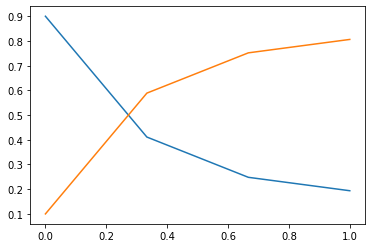

In [79]:
import matplotlib.pyplot as plt
pr=ODEproblem("linear_system2")
t_span=np.linspace(0,pr.T_fin,4)
rk44=rk.loadRKM('RK44')
tt,uu=explicitRK(pr.flux,t_span,pr.u0,rk44.A,rk44.b,rk44.c)
plt.plot(tt,uu[0,:])
plt.plot(tt,uu[1,:])

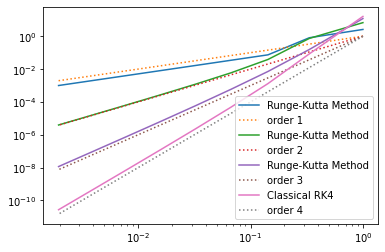

In [82]:
def error(tt,yy):
    errors=np.zeros(len(tt))
    for it, t in enumerate(tt):
        errors[it]=np.linalg.norm(yy[:,it]-pr.exact(yy[:,0],t))
    return np.mean(errors)

Ns=[2**k for k in range(1,10)]
solvers=[rk1,rk2,rk3,rk44]

errorEx=np.zeros((len(solvers),len(Ns)))
dts=    np.zeros(len(Ns))



for iN, N in enumerate(Ns):
    tspan=np.linspace(0,pr.T_fin,N)
    dts[iN]=tspan[1]-tspan[0]
    for iS, rk in enumerate(solvers):
        tt,yy=explicitRK(pr.flux,tspan,pr.u0,rk.A,rk.b,rk.c)
        errorEx[iS,iN]=error(tt,yy)

plt.figure()
for iS, rk in enumerate(solvers):
    plt.loglog(dts,errorEx[iS,:],label=rk.name)
    plt.loglog(dts,dts**(rk.order()),":", label="order %d"%(rk.order()))
plt.legend()

## Multistep Methods <a id='multistep'></a>

One of the cons of RK is the need of computing many evaluations of the flux $F$ at each timestep. This can computationally cost a lot.
One can instead exploit the knowledge of the previous states $y^{n-1},y^{n-2},\dots,y^{n-k}$ to obtain $y^n$. 
Multistep methods interpolate previous states to extrapolate the new solution. 

Two types
* Adams methods: use the values of $\lbrace F(t^{n-j},y^{n-j})\rbrace_{j=1}^k$
* General methods: use also the values of $\lbrace y^{n-j}\rbrace_{j=1}^k$

Example of a general linear multistep method

$$
y^{n+1}+\sum_{j=1}^k \alpha_j y^{n-j+1} = \Delta t \sum_{j=0}^k \beta_j F(t^{n-j+1},y^{n-j+1})
$$




### Adams Bashforth methods
**Main idea**

$$
y(t^{n+1})=y(t^{n})+\int_{t^{n}}^{t^{n+1}} F(t,y(t))dt \approx y^{n+1} = y^{n}+\int_{t^{n}}^{t^{n+1}} P_n (t) dt 
$$

In particular, choose $P_n=P_{n,k}$ to be the interpolant polynomial of degree $\leq k-1$ such that

$$
P_{n,k}(t^{n-j+1})=F^{n-j+1}:=F(t^{n-j+1},y^{n-j+1}),\quad j=1,\dots, k.
$$

Using Lagrange interpolation polynomials, we can write

$$
P_{n,k}(t):=\sum_{j=1}^k F^{n-j+1} L_{n,j,k}(t), \quad \text{with } L_{n,j,k}(t)=\prod_{i=1,i\neq j}^{k} \frac{ t-t^{n+1-i}}{t^{n+1-j}-t^{n+1-i}}
$$

Defining

$$
b_{n,j,k}:=\frac{1}{t^{n+1}-t^{n}} \int_{t^{n}}^{t^{n+1}} L_{n,j,k}(t) dt, \quad j=1,\dots,k
$$

the method reads

$$
y^{n+1}:=y^n + \Delta t \sum_{j=1}^k b_{n,j,k} F^{n-j+1}, \quad \text{for } n\geq k\\
F^{n+1}:=F(t^{n+1},y^{n+1}).
$$

* Explicit method
* $k=0$ Explicit Euler
* Error at each step (we can aim to) $\mathcal O (\Delta t^{k+1})$, global error is $\mathcal O (\Delta t^{k})$

#### Starting values
Starting with the initial value problem, to compute $y^1$ we do not know $y^{-1}, \dots, y^{-k+1}$. One can proceed in different ways in this case.
* Start with $k$ steps of RK methods
* Start with an exact solution (if available)
* Change $k$ along the method (order of accuracy could be lost -> Change the step size)
* Few implicit steps and then explicit

#### Adams Bashforth parameters

$$
\begin{array}
{c|cccc}
k & b_{n,1,k} & b_{n,2,k} & b_{n,3,k}  & b_{n,4,k} &b_{n,5,k}\\
\hline
1& 1\\
2& \frac{3}{2} & -\frac{1}{2}\\
3& \frac{23}{12} & -\frac{4}{3} & \frac{5}{12} \\
4& \frac{55}{24}& -\frac{59}{24} & \frac{37}{24} &-\frac{3}{8} \\
5& \frac{1901}{720}& -\frac{1387}{360} & \frac{109}{30} &-\frac{637}{360} & \frac{251}{720} 
\end{array} 
$$

### Adams Moulton methods (implicit)

In particular, choose $P_n=P_{n,k}$ to be the interpolant polynomial of degree $\leq k$ such that

$$
P_{n,k}(t^{n-j})=F^{n-k}:=F(t^{n-j},y^{n-j}),\quad j=0,\dots, k.
$$

Using Lagrange interpolation polynomials, we can write

$$
P_{n,k}(t):=\sum_{j=0}^k F^{n-j+1} L_{n,j,k}(t), \quad \text{with } L_{n,j,k}(t)=\prod_{i=0,i\neq j}^{k} \frac{ t-t^{n-i+1}}{t^{n-j+1}-t^{n-i+1}}
$$

Defining

$$
b_{n,j,k}:=\frac{1}{t^{n+1}-t^{n}} \int_{t^{n}}^{t^{n+1}} L_{n,j,k}(t) dt, \quad j=0,\dots,k
$$

the method reads

$$
y^{n+1}:=y^n + \Delta t \sum_{j=0}^k b_{n,j,k} F^{n-j+1}, \quad \text{for } n\geq k\\
F^{n+1}=F(t^{n+1},y^{n+1}),
$$

i.e., at each step we have to solve

$$
y^{n+1}-\Delta t b_{n,0,k} F(t^{n+1},y^{n+1}):=y^n + \Delta t \sum_{j=1}^k b_{n,j,k} F^{n-j+1}, \quad \text{for } n\geq k\\
$$

Unique solution if $\Delta t b_{n,0,k} L< 1$ ($L$ Lipschitz continuity constant of $F$), solution can be obtained with the fixed point iteration method.

* Implicit method
* $k=0$ Implicit Euler
* Error at each step $\mathcal O (\Delta t^{k+2})$, global error is $\mathcal O (\Delta t^{k+1})$
* Same problems with starting values

#### Adams Moulton parameters

$$
\begin{array}
{c|ccccc|c}
k & b_{n,0,k} & b_{n,1,k} & b_{n,2,k} & b_{n,3,k}  & b_{n,4,k} & Notes\\
\hline
0& 1 &&&&& \text{Implicit Euler}\\
1& \frac{1}{2} & \frac{1}{2} &&&&\text{ Crank-Nicolson}\\
2& \frac{5}{12} & \frac{2}{3} & -\frac{1}{12}  \\
3& \frac{3}{8}& \frac{19}{24} & -\frac{5}{24} & \frac{1}{24} \\
4& \frac{251}{720}& \frac{323}{360} & -\frac{11}{30} & \frac{53}{360} & -\frac{19}{720} 
\end{array} 
$$

#### How to render Adams Moulton explicit?

Use Adams Bashforth (AB) to compute $y^{n+1,*}$, then update the value with Adams Moulton (AM) formula, where the obtained value can be substituted into $F(t^{n+1},y^{n+1,*})$. In particular, we use a $k*$ for Adam Bashforth that is equal to $k$ of AM, this means that we use during AB one extra value of $F$ with respect to the ones we use in AM.

[-1/2 3/2 0]
[-1/12 2/3 5/12]


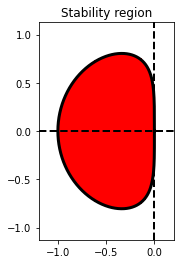

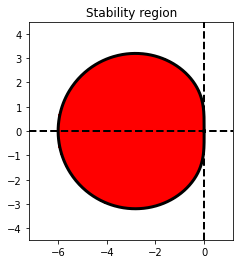

In [96]:
# Be carefull with notation
import nodepy.linear_multistep_method as lm
AB3=lm.Adams_Bashforth(3)
print(AB3.beta)

AM3=lm.Adams_Moulton(3)
print(AM3.beta)

plt.figure()
AB3.plot_stability_region()

plt.figure()
AM3.plot_stability_region();

Order 2
Adam Bashforth


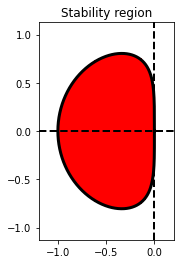

Adam Moulton


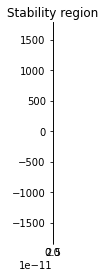

Order 3
Adam Bashforth


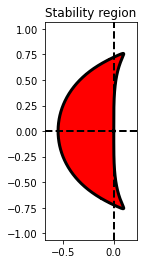

Adam Moulton


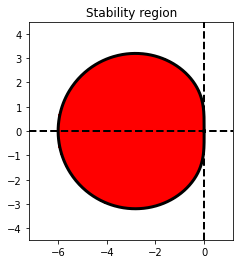

Order 4
Adam Bashforth


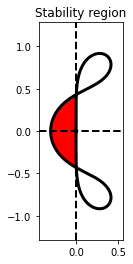

Adam Moulton


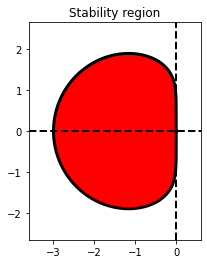

Order 5
Adam Bashforth


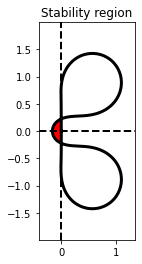

Adam Moulton


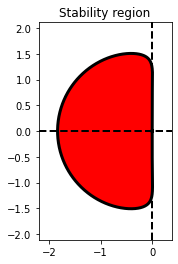

Order 6
Adam Bashforth


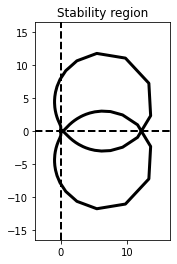

Adam Moulton


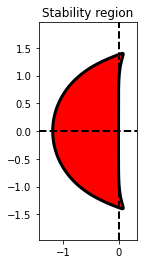

Order 7
Adam Bashforth


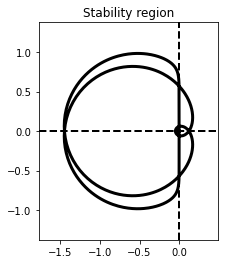

Adam Moulton


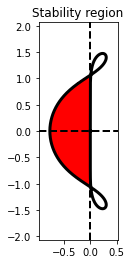

Order 8
Adam Bashforth


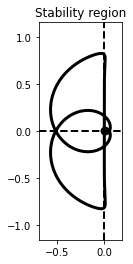

Adam Moulton


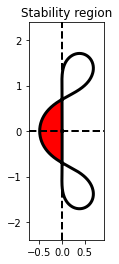

Order 9
Adam Bashforth


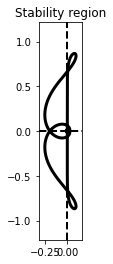

Adam Moulton


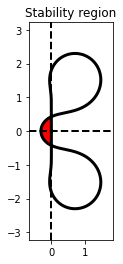

In [153]:
# Be carefull with notation
import nodepy.linear_multistep_method as lm
for order in range(2,10):
    print("Order %d"%(order))
    AB=lm.Adams_Bashforth(order)
    AM =lm.Adams_Moulton(order-1)
    print("Adam Bashforth")
    plt.figure()
    AB.plot_stability_region()
    plt.show()
    print("Adam Moulton")
    plt.figure()
    AM.plot_stability_region()
    plt.show()

#### Implement the Adams Bashforth method

Pass in input the coefficients $b_j$ of the scheme and the initial $k$ values needed. 

In [108]:
## explicit Adams Bashforth method
def multiAB(flux, tspan, y_0, b):
    # Solving u'=F(u,t)
    # input: flux=F, tspan is a vector of times determining the RK steps
    # input: y_0 the initial condition with the first k values of the solution
    # input: b are k+1 b_j coefficients where the last one is 0
    N_time=len(tspan)  # N+1
    dim=y_0.shape[0]          # S
    y=np.zeros((dim,N_time))    # initializing the variable of solutions
    k = len(b)-1                # size of AB
    if y_0.shape[1] < k:
        raise ValueError("Input vector is too small")
    y[:,:k]=y_0                  # first timesteps 
    n0=k-1                       # last index assigned
    Fu=np.zeros((dim,k))         # Flux at internal stages
    for j in range(k):
        Fu[:,j]=flux(y[:,j])
    for n in range(n0,N_time-1):    # n=0,..., N-1
        delta_t=tspan[n+1]-tspan[n]
        y[:,n+1]=y[:,n]
        for j in range(k):
            y[:,n+1]=y[:,n+1]+delta_t*b[j]*Fu[:,j]
        Fu[:,:k-1] = Fu[:,1:]
        Fu[:,k-1] = flux(y[:,n+1])
    return tspan, y 

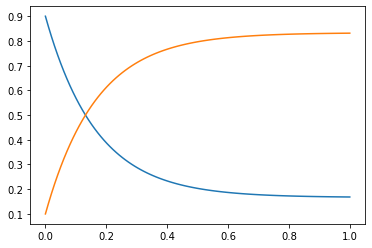

In [129]:
order = 2
N=100 #5
AB=lm.Adams_Bashforth(order)
pr=ODEproblem("linear_system2")
t_span=np.linspace(0,pr.T_fin,N)
y_0 = np.zeros((len(pr.u0),order))
for j in range(order):
    y_0[:,j] = pr.exact(pr.u0,t_span[j])
    
tt,uu=multiAB(pr.flux,t_span,y_0,AB.beta)
plt.plot(tt,uu[0,:])
plt.plot(tt,uu[1,:])

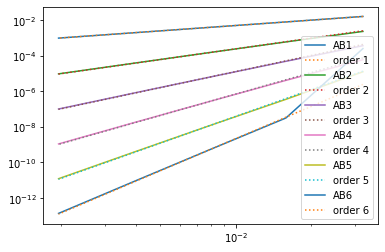

In [124]:
## TEST CONVERGENCE! 
pr=ODEproblem("linear_system2")
def error(tt,yy):
    errors=np.zeros(len(tt))
    for it, t in enumerate(tt):
        errors[it]=np.linalg.norm(yy[:,it]-pr.exact(yy[:,0],t))
    return np.mean(errors)

Ns=[2**k for k in range(5,10)]
maxOrder=6

errorEx=np.zeros((maxOrder,len(Ns)))
dts=    np.zeros(len(Ns))




for iN, N in enumerate(Ns):
    tspan=np.linspace(0,pr.T_fin,N)
    dts[iN]=tspan[1]-tspan[0]
    for iorder in range(maxOrder):
        order=iorder+1
        AB=lm.Adams_Bashforth(order)
        y_0 = np.zeros((len(pr.u0),order))
        for j in range(order):
            y_0[:,j] = pr.exact(pr.u0,tspan[j])
        tt,yy=multiAB(pr.flux,tspan,y_0,AB.beta)
        errorEx[iorder,iN]=error(tt,yy)

plt.figure()
for iorder in range(maxOrder):
    order=iorder+1
    plt.loglog(dts,errorEx[iorder,:],label="AB"+str(order))
    plt.loglog(dts,dts**(order)*errorEx[iorder,2]/dts[2]**order,":", label="order %d"%(order))
plt.legend()

**Pro exercise** Code the combined Adams Moulton Bashforth method
Example $k$th order:

$$
y^{*,n+1}=y^n +\Delta t \sum_{j=1}^k b^{AB}_{n,j,k} F(y^{n+1-j})\\
y^{n+1} = y^{n} +\Delta t b^{AM}_{n,0,k-1} F(y^{*,n+1}) + \Delta t \sum_{j=1}^{k-1} b^{AM}_{n,j,k-1} F(y^{n+1-j})
$$

In [136]:
### ADAMS moulton Bashforth
# We combine the two methods, in order to get something positive
## explicit Adams Bashforth method
def multiAMB(flux, tspan, y_0, bAB, bAM):
    # Solving u'=F(u,t)
    # input: flux=F, tspan is a vector of times determining the RK steps
    # input: y_0 the initial condition with the first k values of the solution
    # input: bAB are k+1 b_j coefficients where the last one is 0 of Adam Bashforth
    # input: bAB are k b_j coefficients of Adams Moulton
    N_time=len(tspan)  # N+1
    dim=y_0.shape[0]          # S
    y=np.zeros((dim,N_time))    # initializing the variable of solutions
    k = len(bAB)-1                # size of AB
    if y_0.shape[1] < k:
        raise ValueError("Input vector is too small")
    y[:,:k]=y_0                  # first timesteps 
    n0=k-1                       # last index assigned
    Fu=np.zeros((dim,k))         # Flux at internal stages
    for j in range(k):
        Fu[:,j]=flux(y[:,j])
    for n in range(n0,N_time-1):    # n=0,..., N-1
        delta_t=tspan[n+1]-tspan[n]
        y[:,n+1]=y[:,n]
        for j in range(k):
            y[:,n+1]=y[:,n+1]+delta_t*bAB[j]*Fu[:,j]
        Fu[:,:k-1] = Fu[:,1:]
        Fu[:,k-1] = flux(y[:,n+1])
        y[:,n+1] = y[:,n]
        for j in range(k):
            y[:,n+1] =y[:,n+1] +delta_t*bAM[j]*Fu[:,j]
        Fu[:,k-1] =flux(y[:,n+1])
    return tspan, y 

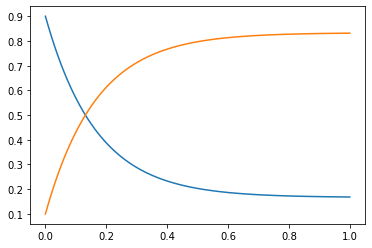

In [142]:
order = 2
N=100 #5
AB=lm.Adams_Bashforth(order)
AM=lm.Adams_Moulton(order-1)
pr=ODEproblem("linear_system2")
t_span=np.linspace(0,pr.T_fin,N)
y_0 = np.zeros((len(pr.u0),order))
for j in range(order):
    y_0[:,j] = pr.exact(pr.u0,t_span[j])
    
tt,uu=multiAMB(pr.flux,t_span,y_0,AB.beta, AM.beta)
plt.plot(tt,uu[0,:])
plt.plot(tt,uu[1,:])

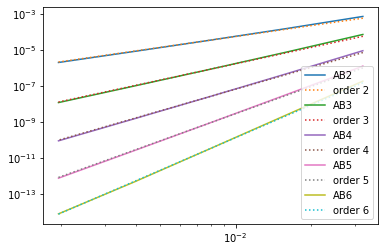

In [143]:
## TEST CONVERGENCE! 
pr=ODEproblem("linear_system2")
def error(tt,yy):
    errors=np.zeros(len(tt))
    for it, t in enumerate(tt):
        errors[it]=np.linalg.norm(yy[:,it]-pr.exact(yy[:,0],t))
    return np.mean(errors)

Ns=[2**k for k in range(5,10)]
orders=range(2,7)
maxOrder=len(orders)

errorEx=np.zeros((maxOrder,len(Ns)))
dts=    np.zeros(len(Ns))




for iN, N in enumerate(Ns):
    tspan=np.linspace(0,pr.T_fin,N)
    dts[iN]=tspan[1]-tspan[0]
    for iorder,order in enumerate(orders):
        AB=lm.Adams_Bashforth(order)
        AM=lm.Adams_Moulton(order-1)
        y_0 = np.zeros((len(pr.u0),order))
        for j in range(order):
            y_0[:,j] = pr.exact(pr.u0,tspan[j])
        tt,yy=multiAMB(pr.flux,tspan,y_0,AB.beta,AM.beta)
        errorEx[iorder,iN]=error(tt,yy)

plt.figure()
for iorder,order in enumerate(orders):
    plt.loglog(dts,errorEx[iorder,:],label="AB"+str(order))
    plt.loglog(dts,dts**(order)*errorEx[iorder,2]/dts[2]**order,":", label="order %d"%(order))
plt.legend()